In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mfmodeling import SingleGP
from time import time as timer
import pickle

2025-09-23 07:51:01.221567: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-23 07:51:02.998481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/maeyama/mylib/Miniforge3/envs/dps_3.12.11/lib/python3.12/site-packages/gpflow/versions.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resource

(521, 1) (521, 1)


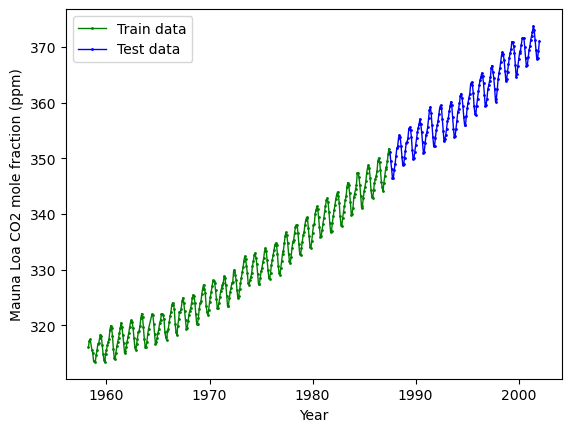

In [2]:
df = pd.read_csv("co2_data.csv")
x = df["year"].to_numpy()[:,np.newaxis]
y = df["co2"].to_numpy()[:,np.newaxis]

data_all = [x,y]
print(x.shape, y.shape)
nsplit = data_all[0].shape[0]//3*2
data_train = [x[:nsplit],y[:nsplit]]
data_test = [x[nsplit:],y[nsplit:]]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(data_train[0], data_train[1], 'g.-', label='Train data', linewidth = 1, markersize=2)
ax.plot(data_test[0], data_test[1], 'b.-', label='Test data', linewidth = 1, markersize=2)
ax.set_xlabel("Year")
ax.set_ylabel("Mauna Loa CO2 mole fraction (ppm)")
ax.legend()
plt.show()

2025-09-23 08:16:46.749644: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-23 08:16:46.749967: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-23 08:16:46.750235: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-23 08:16:46.760173: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-23 08:16:46.760374: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-23 08:16:46.760561: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE


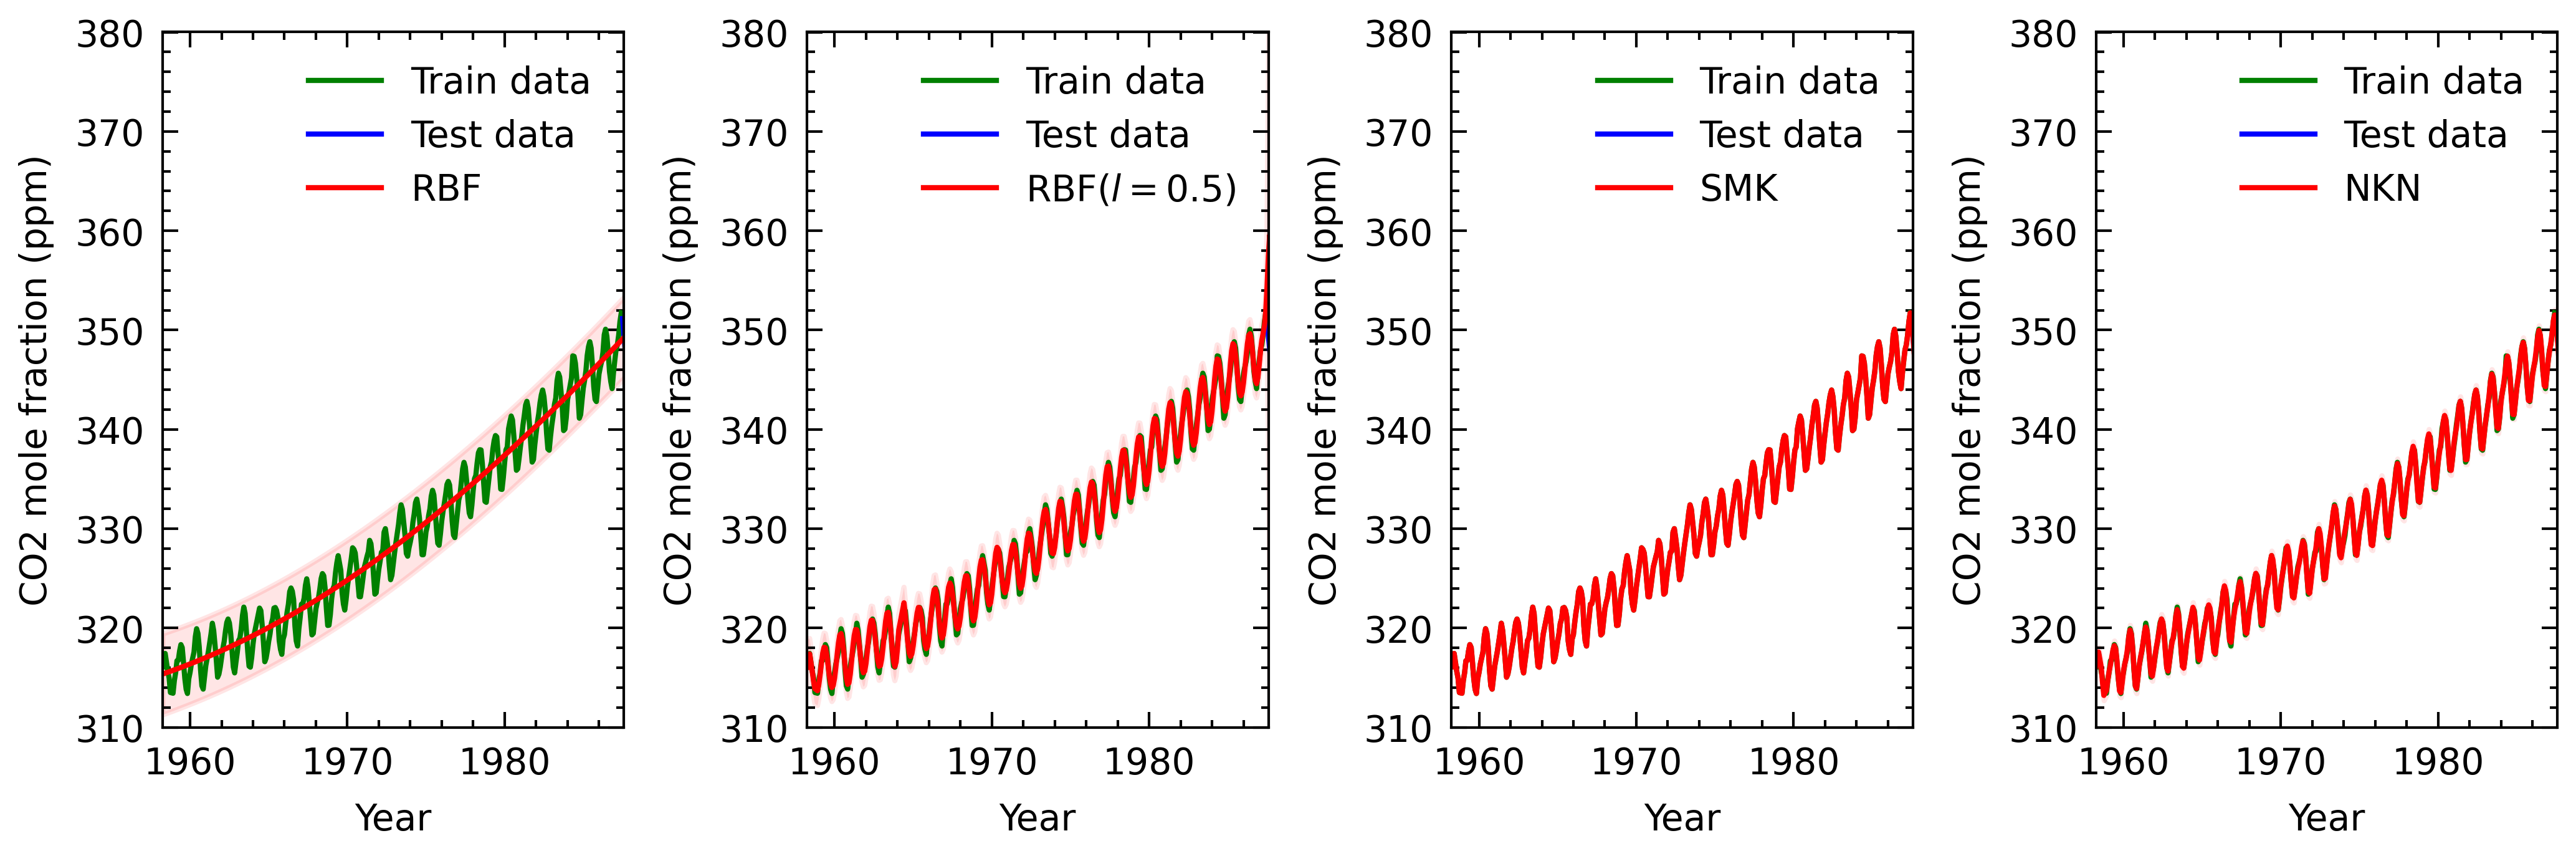

In [12]:
# Load pickels of optimized models
with open("model_singleGP_RBF.pkl","rb") as f:
    model_01_RBF = pickle.load(f)
with open("model_singleGP_RBF_length0.5.pkl","rb") as f:
    model_02_RBF_length05 = pickle.load(f)
with open("model_singleGP_SMK.pkl","rb") as f:
    model_03_SMK = pickle.load(f)
with open("model_singleGP_NKN.pkl","rb") as f:
    model_04_NKN = pickle.load(f)
mean_list = []
var_list = []
mean, var = model_01_RBF.predict(x); mean_list.append(mean[:,0]); var_list.append(var[:,0])
mean, var = model_02_RBF_length05.predict(x); mean_list.append(mean[:,0]); var_list.append(var[:,0])
mean, var = model_03_SMK.predict(x); mean_list.append(mean[:,0]); var_list.append(var[:,0])
mean, var = model_04_NKN.predict(x); mean_list.append(mean[:,0]); var_list.append(var[:,0])
label_list = [r"RBF", r"RBF($l=0.5$)",r"SMK",r"NKN"]


plt.style.use('../nature_style.txt')

fig=plt.figure(figsize=(7,2.4),dpi=600) # figsize=(width,height(inch)),dpi(dots per inch)
for i in range(4):
    ax = fig.add_subplot(1,4,i+1)
    ax.plot(data_train[0], data_train[1], 'g-', label='Train data', linewidth = 1, markersize=2)
    ax.plot(data_test[0], data_test[1], 'b-', label='Test data', linewidth = 1, markersize=2)
    ax.plot(x[:,0], mean_list[i], 'r', label=label_list[i], linewidth = 1)
    ax.fill_between(x[:,0], (mean_list[i]-2.0*np.sqrt(var_list[i])), (mean_list[i]+2.0*np.sqrt(var_list[i])), alpha=0.1, color='red')
    ax.set_xlabel("Year")
    ax.set_ylabel("CO2 mole fraction (ppm)")
    ax.set_ylim(310,380)
    ax.set_xlim(data_train[0][0],data_test[0][-1])
    ax.legend()
fig.tight_layout()
plt.savefig("fig1.pdf",dpi=600,bbox_inches="tight")
plt.show()